# Imports/Read in data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.stats.stats import pearsonr
import seaborn as sns

path = '/Users/emilysf098/Desktop/Research/SN-Spectral-Evolution'
sdss_combined = pd.read_csv(path + '/results/sdss_combined.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
sdss_combined

#Benetti 2005 finds positive correlation with ratio and delta m15(B)
#dm15PSNIDzspec = delta m15 ?? (change in observed mag after 15 days) 

#Nugent 1995 finds negative correlation with ratio and observed Mb
#We have Peakrmag not Mb -> calculate Mb (how? )

feat_name  obj_id       time   feat_start     feat_end           vel  \
0         pW6   19128  2454387.5  5630.787447  5932.631261   8144.168668   
1         pW2    2017  2453636.5  3908.025238  4040.182181           NaN   
2         pW1    2017  2453636.5  3615.136877  3908.025238  13865.174056   
3         pW2   19128  2454387.5  3942.640340  4073.335600   8793.661154   
4         pW1    2689  2453637.5  3657.035407  3918.106397  11820.961436   
5         pW7    2916  2453644.5  5950.568643  6347.325726  10051.258699   
6         pW6    2916  2453644.5  5646.531964  5944.099777   8791.600710   
7         pW5    2916  2453644.5  5180.773649  5599.093617   7738.169661   
8         pW4    2916  2453644.5  4542.512254  5189.398803  17462.403854   
9         pW3    2916  2453644.5  4104.785689  4536.043388   8734.012506   
10        pW2    2916  2453644.5  3912.876012  4094.004246   9566.102469   
11        pW1    2916  2453644.5  3639.027373  3923.657455  12459.276662   
12        pW2    2689  2453637.5  3915.960608  4082.616885           NaN   
13        pW3    2689  2453637.5  4082.616885  4547.537827   9782.115893   
14        pW4    2689  2453637.5  4544.676775  5232.044507  12349.368835   
15        pW5   19128  2454387.5  5210.695540  5630.787447   7258.011924   
16        pW1   19128  2454387.5  3572.337104  3947.308028  13497.426179   
17        pW7   19128  2454387.5  5937.298949  6408.735422   9516.319374   
18        pW3    2017  2453636.5  4036.610372  4647.389758  12101.836147   
19        pW4    2017  2453636.5  4647.389758  5076.006871  17475.405332   
20        pW3   19128  2454387.5  4081.115080  4538.548489   9098.379472   
21        pW4   19128  2454387.5  4536.992593  5132.900742  16582.782915   
22        pW6    2017  2453636.5  5679.642639  5968.959191   4701.143496   
23        pW5    2017  2453636.5  5129.584011  5679.642639   6870.539852   
24        pW7    2017  2453636.5  5968.959191  6329.711928   8917.697688   
25        pW6   17186  2454354.5  5613.326552  5934.643199  10166.275984   
26        pW7   17186  2454354.5  5940.330219  6312.830048  11452.024177   
27        pW7   19968  2454413.5  5920.645729  6348.116244  10339.362985   
28        pW5   17186  2454354.5  5195.330560  5610.483042   9151.912170   
29        pW4   17186  2454354.5  4598.193430  5192.487050  16796.544808   
30        pW3   17186  2454354.5  4077.831073  4504.357595  11719.186866   
31        pW7    2372  2453637.5  5822.181605  6568.463077   9258.169181   
32        pW6   19968  2454413.5  5667.652975  5850.854624  10655.454406   
33        pW3    2372  2453637.5  4065.895133  4526.709914  11938.888409   
34        pW2    2372  2453637.5  3936.838939  4065.895133   8986.860175   
35        pW1    2372  2453637.5  3588.948328  3936.838939  17722.188697   
36        pW4   19968  2454413.5  4606.246595  5205.286908  18058.855806   
37        pW2   19968  2454413.5  3919.967402  4088.629237   9999.655784   
38        pW3   19968  2454413.5  4091.537200  4527.731603   9954.315589   
39        pW2   17186  2454354.5  3947.029606  4074.987563   9086.445393   
40        pW5   19968  2454413.5  5208.194871  5565.874281   7641.118421   
41        pW6    5994  2453666.5  5635.778990  5914.293952  10903.700974   
42        pW7    5994  2453666.5  5973.076005  6387.349516   9320.886285   
43        pW2    5994  2453666.5  3927.600540  4092.050330   8622.715283   
44        pW3    5994  2453666.5  4092.050330  4548.311022   9934.359620   
45        pW4    5994  2453666.5  4547.611235  5141.729836  17876.372612   
46        pW5    5994  2453666.5  5150.827058  5574.197792   8314.054979   
47        pW1    5994  2453666.5  3663.081305  3929.000113  12257.110308   
48        pW7   17745  2454373.5  5981.447037  6345.053402   9948.185180   
49        pW6   17745  2454373.5  5640.926790  5955.475154   8307.380472   
50        pW5   17745  2454373.5  5199.404776  5614.954907   8216.567965   
51        pW4   17366  2454352.5  4510.424300  5213.

# Define important Lists to create tables

In [32]:
CID = list(set(sdss_combined['obj_id']))
#list of non-repeated object IDs

#lists to create end table
ratio_ls = []
cid_ls = []

#properties to create end table
age_ls = []
ssfr_ls = []
zcmb_ls = []
zspechelio_ls = []
mass_ls = []
kpc_ls = []
del15_ls = []
del15_err = []
peakMr_ls = []
x0_ls = []
x1_ls = []
color_ls = []
mu_ls = []

ratio_err_ls = []

#list of branch types to create end table
branch_ls = []

#lists of properties and names for pearson correlation
prop_ls = [age_ls, ssfr_ls, zcmb_ls, zspechelio_ls, mass_ls, kpc_ls, del15_ls, del15_err, peakMr_ls, x0_ls, x1_ls, color_ls,
            mu_ls, branch_ls]
names_ls = ['ageFSPS', 'logSSFRFSPS', 'zCMB', 'zspecHelio', 'logMassFSPS', 'kpc', 'dm15PSNIDzspec', 'dm15errPSNIDzspec',
           'Peakrmag', 'x0SALT2zspec', 'x1SALT2zspec', 'cSALT2zspec', 'muSALT2zspec', 'branch_type']

#total list of properties and names for data table creation
total_prop_ls = [cid_ls, ratio_ls, ratio_err_ls, age_ls, ssfr_ls, zcmb_ls, zspechelio_ls, mass_ls, kpc_ls, del15_ls, del15_err, peakMr_ls, x0_ls, x1_ls, color_ls,
                mu_ls, branch_ls]
total_names_ls = ['obj_id', 'pw6/pw7', 'ratio_err', 'ageFSPS', 'logSSFRFSPS', 'zCMB', 'zspecHelio', 'logMassFSPS', 'kpc', 'dm15PSNIDzspec', 'dm15errPSNIDzspec', 
                   'Peakrmag', 'x0SALT2zspec', 'x1SALT2zspec', 'cSALT2zspec', 'muSALT2zspec', 'branch_type']

ratio_df = pd.DataFrame()

# Fill in Lists and make table of properties

In [33]:
#iterate over each object ID 
for cid in CID:
    
    #create table only for object ID we're looking at
    new_table = sdss_combined[sdss_combined['obj_id'] == cid]
    
    #only look at object if contains measurement for both pW6 and pW7
    if 'pW6' in list(new_table['feat_name']) and 'pW7' in list(new_table['feat_name']):
        cid_ls.append(cid)
        new_table = new_table.set_index('feat_name')
        
        #append all corresponding properties to lists to later create table
        for prop, name in zip(prop_ls, names_ls):
            obj = new_table[name].loc['pW6']
            prop.append(obj)
        
        #get pEW values for 6 and 7 to calculate ratio
        pew6 = new_table['pew'].loc['pW6']
        pew7 = new_table['pew'].loc['pW7']
    
        #calculate ratio and append to list
        ratio = pew6/pew7
        ratio_ls.append(ratio)
        
        #propagate error 
        err6 = new_table['pew_samperr'].loc['pW6']
        err7 = new_table['pew_samperr'].loc['pW7']
        
        err_sq = ((1/pew7)**2 * err6**2) + ((pew6/pew7**2)**2 * err7**2)
        err = (err_sq)**(1/2)
        ratio_err_ls.append(err)

In [34]:
#create table
for prop, name in zip(total_prop_ls, total_names_ls):
    ratio_df[name] = prop

In [35]:
ratio_df
#histograms, reproduce the figure in benetti and nugent 

obj_id   pw6/pw7  ratio_err  ageFSPS  logSSFRFSPS      zCMB  zspecHelio  \
0    19968  0.191672   0.008417     6.93       -14.70  0.054896    0.055939   
1    19969  0.126313   0.057215     3.67       -10.14  0.174279    0.175317   
2     3592  0.165059   0.046844     5.30       -10.36  0.085433    0.086578   
3    21006  0.088935   0.094499      NaN          NaN  0.290206    0.291000   
4     6699  0.318099   0.030404     4.76       -10.54  0.309149    0.310600   
5     1580  0.302361   0.089486     9.52       -17.73  0.183217    0.184000   
6     6192  0.226816   0.053565     2.50       -10.01  0.270906    0.272471   
7     6196  0.265530   0.085657     6.50       -11.12  0.279800    0.281345   
8    10805  0.116896   0.027452     4.77       -10.26  0.043968    0.045248   
9    12860  0.128329   0.063608     3.64       -10.20  0.120422    0.121679   
10    2635  0.266267   0.064582     3.42       -10.14  0.143104    0.143700   
11    5717  0.260302   0.034605     2.66       -10.04  0.250368    0.251700   
12   16482  0.319759   0.038892     6.74       -14.87  0.209367    0.210771   
13    6249  0.223492   0.077670     2.95       -10.05  0.293530    0.295061   
14    6773  0.308464   0.074940     3.90       -10.19  0.089320    0.090300   
15    2165  0.296625   0.123007     3.67       -10.15  0.286619    0.288000   
16   15508  0.207732   0.082507     4.05       -10.23  0.133526    0.134604   
17   16021  1.131954   0.103871     5.00       -10.35  0.123356    0.124597   
18   12950  0.212463   0.039189     3.81       -10.16  0.081411    0.082734   
19   21502  0.176828   0.029527     7.93       -11.28  0.087836    0.089163   
20    6304  0.146127   0.027797     6.33       -10.67  0.189787    0.190934   
21    7847  0.142821   0.036624     5.43       -10.62  0.211597    0.212659   
22   19128  0.154745   0.023607      NaN          NaN  0.285433    0.287000   
23   10434  0.332382   0.034533     7.26       -10.82  0.102877    0.104161   
24    7876  0.126132   0.109870     4.02       -10.20  0.074891    0.076023   
25   10449  0.763307   0.140226     3.66       -10.14  0.240535    0.242027   
26    5844  0.356415   0.081376      NaN          NaN  0.309294    0.310800   
27    1241  0.353047   0.052042     7.93       -11.36  0.088477    0.089790   
28   18650  0.262326   0.098952     3.50       -10.13  0.112425    0.113713   
29   16099  0.036458   0.036119     5.42       -10.39  0.195801    0.196948   
30   16100  0.175286   0.025629     8.41       -16.75  0.193921    0.195000   
31    1253  0.512061   0.144340     7.71       -17.02  0.261657    0.263071   
32    2789  0.464975   0.149709     6.12       -11.11  0.288898    0.290479   
33   16618  0.154105   0.021298     3.12       -10.11  0.191925    0.193145   
34   13038  0.377515   0.069603      NaN          NaN  0.102644    0.104000   
35    3317  0.317469   0.051546     5.02       -10.31  0.159901    0.161011   
36    2308  0.182549   0.027899      NaN          NaN  0.147025    0.148000   
37   18697  0.195687   0.052809     4.78       -10.25  0.106377    0.107623   
38   13072  0.416186   0.132068     2.15        -9.99  0.229162    0.230633   
39    5395  0.434471   0.156175     3.55       -10.14  0.116348    0.117000   
40    6933  0.103323   0.034600      NaN          NaN  0.211630    0.213000   
41    6422  0.080546   0.128185     4.34       -10.25  0.185002    0.186455   
42    6936  0.257009   0.038991     5.03       -10.32  0.178899    0.180212   
43    2330  0.222886   0.056901     4.80       -10.29  0.211788    0.213200   
44   15132  0.107411   0.046088     7.59       -10.05  0.153037    0.154382   
45   17186  0.230301   0.056259     5.00       -10.33  0.078487    0.079443   
46   13099  0.343351   0.025028     4.64       -10.28  0.264510    0.266025   
47    7473  0.145853   0.042141     4.96       -10.34  0.214569    0.216000   
48   18740  0.303523   0.096648     5.91       -10.53  0.153167    0.154411   
49    5944  0.202953   0.019676     7.66       -13.94 

Text(0.5, 0, 'Peakrmag')

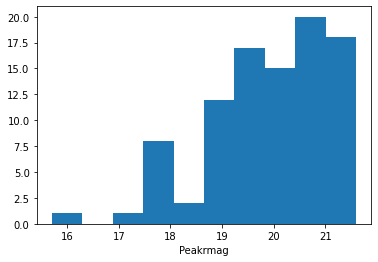

In [36]:
plt.hist([ratio_df['Peakrmag']])
plt.xlabel('Peakrmag')

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'dm15PSNIDzspec')

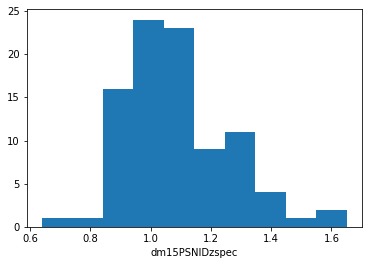

In [37]:
plt.hist([ratio_df['dm15PSNIDzspec']])
plt.xlabel('dm15PSNIDzspec')

Text(0.5, 0, 'pw6/pw7')

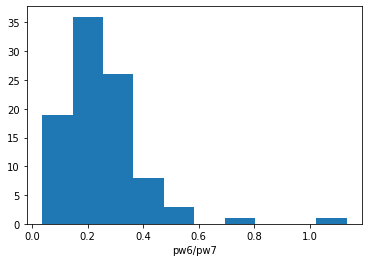

In [38]:
plt.hist([ratio_df['pw6/pw7']])
plt.xlabel('pw6/pw7')

Text(0, 0.5, 'pw6/pw7')

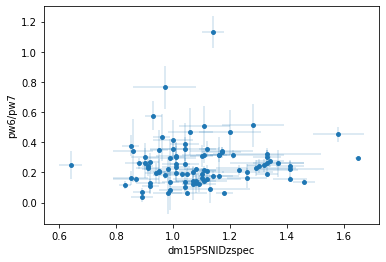

In [39]:
plt.scatter(ratio_df['dm15PSNIDzspec'],ratio_df['pw6/pw7'], s = 15)
plt.errorbar(ratio_df['dm15PSNIDzspec'],ratio_df['pw6/pw7'], xerr = ratio_df['dm15errPSNIDzspec'],
             yerr = ratio_df['ratio_err'], linestyle = 'None', alpha = 0.2, ms = 0.3)
plt.xlabel('dm15PSNIDzspec')
plt.ylabel('pw6/pw7')
#error prop. for error bars on ratio

Text(0, 0.5, 'pw6/pw7')

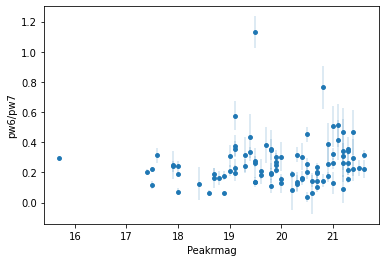

In [40]:
plt.scatter(ratio_df['Peakrmag'],ratio_df['pw6/pw7'], s = 15)
plt.errorbar(ratio_df['Peakrmag'],ratio_df['pw6/pw7'], xerr = None,
             yerr = ratio_df['ratio_err'], linestyle = 'None', alpha = 0.2, ms = 0.3)
plt.xlabel('Peakrmag') #no errors provided
plt.ylabel('pw6/pw7')
#error prop. for error bars on ratio

# create dataframe of pearson values for each property

In [44]:
#list of properties we want to find pearson values for vs. Ratio
table_props = ['ageFSPS', 'logSSFRFSPS', 'zCMB', 'zspecHelio', 'logMassFSPS', 'kpc', 'dm15PSNIDzspec', 
               'Peakrmag', 'x0SALT2zspec', 'x1SALT2zspec', 'cSALT2zspec', 'muSALT2zspec'] 



#deltam15, fitted salt2params fit template of lightcurve at 15 days. 
#If we have salt2 of stretch and color, create model and eval in b band for 0 and 15 days and calculate difference
#Find MB
#ratio of calcium line
#bluer/red parts

In [45]:
def pearson_df_make(df):
    '''
    taking a dataframe full of properties we want to compare against the ratio column, calculating the
    c and p values between them, and returning a dataframe with c and p values for each property comparison
    against the pW6/pW7 ratio
    
    Args:
        df = dataframe with columns you want to compare 
        
    Returns:
        pearson_df = dataframe listing property, correlation coeff, and pval
    '''
    
    #create empty dataframe to fill
    pearson_df = pd.DataFrame()
    #empty lists for c and p pearson values 
    c_values = []
    p_values = []
    
    #iterate over each property we want to compare w/ ratio
    for prop in table_props:
        x = df[prop]
        y = df['pw6/pw7']
        
        #take only values where neither x or y is a nan
        no_nan = (np.isfinite(x) & np.isfinite(y))
        
        #calculare c and p pearson values and append to lists
        corr, p = pearsonr(x[no_nan], y[no_nan])
        c_values.append(corr)
        p_values.append(p)
    
    #create table
    pearson_df['property'] = table_props
    pearson_df['corr_coeff'] = c_values
    pearson_df['p_val'] = p_values
    
    return pearson_df

In [46]:
#create pearson tables for all data and individual subtypes
p_df = pearson_df_make(ratio_df)
bl_p_df = pearson_df_make(ratio_df[ratio_df['branch_type'] == 'BL'])
cl_p_df = pearson_df_make(ratio_df[ratio_df['branch_type'] == 'CL'])
cn_p_df = pearson_df_make(ratio_df[ratio_df['branch_type'] == 'CN'])
ss_p_df = pearson_df_make(ratio_df[ratio_df['branch_type'] == 'SS'])

In [47]:
p_df

property  corr_coeff     p_val
0          ageFSPS    0.006255  0.954968
1      logSSFRFSPS   -0.066527  0.547664
2             zCMB    0.137909  0.184995
3       zspecHelio    0.138142  0.184246
4      logMassFSPS    0.122849  0.265587
5              kpc    0.027119  0.806560
6   dm15PSNIDzspec    0.082304  0.435415
7         Peakrmag    0.117958  0.257508
8     x0SALT2zspec   -0.029562  0.777299
9     x1SALT2zspec   -0.058972  0.572348
10     cSALT2zspec   -0.081531  0.434684
11    muSALT2zspec    0.109942  0.291485

# All data

### Rough draft heatmaps - very ugly, not formatted/colored right yet

<AxesSubplot:ylabel='property'>

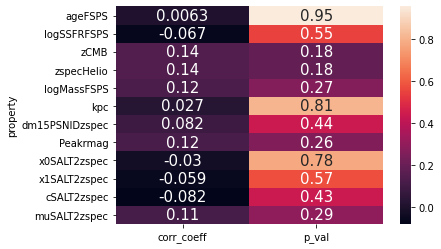

In [48]:
sns.heatmap(p_df.set_index('property'), annot=True, annot_kws={"size": 15})

# Shallow Silicon

<AxesSubplot:ylabel='property'>

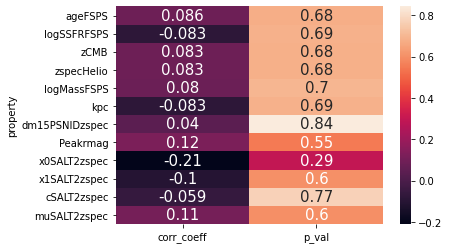

In [49]:
sns.heatmap(ss_p_df.set_index('property'), annot=True, annot_kws={"size": 15})

# Broad Line

<AxesSubplot:ylabel='property'>

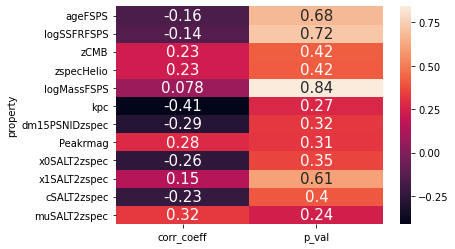

In [50]:
sns.heatmap(bl_p_df.set_index('property'), annot=True, annot_kws={"size": 15})

# Cool

<AxesSubplot:ylabel='property'>

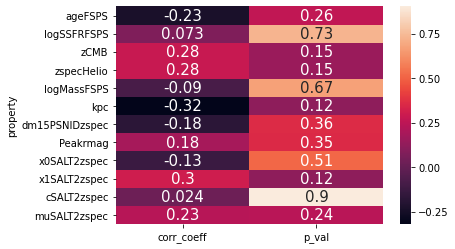

In [51]:
sns.heatmap(cl_p_df.set_index('property'), annot=True, annot_kws={"size": 15})

# Core Normal

<AxesSubplot:ylabel='property'>

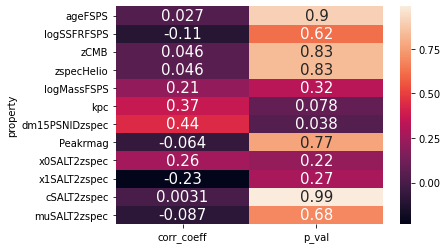

In [52]:
sns.heatmap(cn_p_df.set_index('property'), annot=True, annot_kws={"size": 15})